##  This project is  going to create model predict if the stock price will go up or down tomorrow

## 500SP index Data yahoo finance

### 1. Download packet "yahoo finance api daily stock and index and price"

In [1]:
!pip install yfinance

In [2]:
import yfinance as yf

### Initialze ticker class that enable us to download price history for a singlw symbol. In this case I use GSPC which is the S&P 500 index

In [3]:
sp500 = yf.Ticker("^GSPC")

### Query history data  by use .history method ans pass period = max
- period max = from the beginning

In [4]:
sp500 = sp500.history(period="max") # get all data since the index was created

In [5]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-01-08 00:00:00-05:00,4703.700195,4764.540039,4699.819824,4763.540039,3742320000,0.0,0.0
2024-01-09 00:00:00-05:00,4741.930176,4765.470215,4730.350098,4756.500000,3529960000,0.0,0.0
2024-01-10 00:00:00-05:00,4759.939941,4790.799805,4756.200195,4783.450195,3498680000,0.0,0.0


* From the data Im going to predict if the stock price will go up or down tomorrow. 

*P.S. Im not using dividends and splits data*

In [6]:
# check on index of the sp500 dataframe

sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2023-12-29 00:00:00-05:00', '2024-01-02 00:00:00-05:00',
               '2024-01-03 00:00:00-05:00', '2024-01-04 00:00:00-05:00',
               '2024-01-05 00:00:00-05:00', '2024-01-08 00:00:00-05:00',
               '2024-01-09 00:00:00-05:00', '2024-01-10 00:00:00-05:00',
               '2024-01-11 00:00:00-05:00', '2024-01-12 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24124, freq=None)

## 2. Clening and Visualizing our stock market data

<Axes: xlabel='Date'>

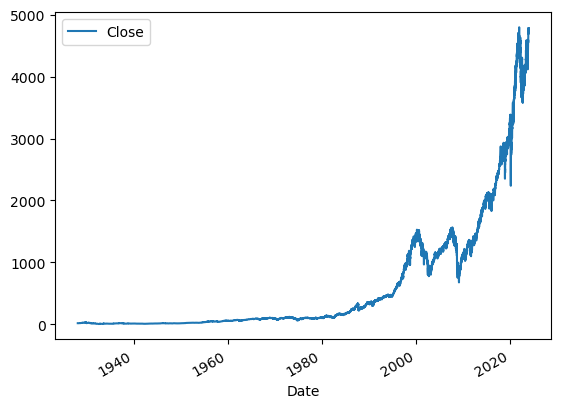

In [7]:
#plot data in the data frame. I will plot the closing price against the index.

sp500.plot.line(y="Close", use_index=True)#show index whuxh is trading days (dates on x-axis)

Delate  the extra columns that we don't need

del sp500["Dividends"]

del sp500["Stock Splits"]

## 3. Setting up Target for machine learning

*Key*

- some people like to predict absolute price so trying to predict if the stock price will be$17 or $18 tomorrow. The promblem is the model can be extremly accurateit can be very doog at predicting the absolute price but you can **Still lose a ton of money because ultimately if you are buying and selling stock we don't care about getting accurate on the absolute price(unless is option). We. care more about  accurate on the directionality id the price will go up or down**

- we can be really close to predicting the actual price and in fact be very far behind on predicting if the stock will go up or down


### So our target saying "on the days that stock goes up can we actually predict that it will go up

- that way if we want to buy the stock we know and the price will go up
 

In [8]:
# Target will be "the stock will go up or down"

#1 create column call tomorrow  = it going to be tommorrow price.and use pandas .shift method to help

sp500["Tomorrow"] = sp500["Close"].shift(-1)# .shift all the price -1 = 1 days


In [10]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tomorrow
Date,,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0,17.500000
...,...,...,...,...,...,...,...,...
2024-01-08 00:00:00-05:00,4703.700195,4764.540039,4699.819824,4763.540039,3742320000,0.0,0.0,4756.500000
2024-01-09 00:00:00-05:00,4741.930176,4765.470215,4730.350098,4756.500000,3529960000,0.0,0.0,4783.450195
2024-01-10 00:00:00-05:00,4759.939941,4790.799805,4756.200195,4783.450195,3498680000,0.0,0.0,4780.240234


### Set up our Machine Learning target

base on

* Base on tomorrow price we can set the tarket now.  target = tmor's price greater than today's price

* This will return boolean indicating if tomorrow price > today price. 

* so we need to covert it to interger (numerical) so we can use it in machine learning
    - by use .astype(int) method
    
* New Target should be 1 = price will go up , 0 = price will go down

In [11]:
# Base on tomorrow price we can set the tarket now.  target = tmor's price greater than today's price
# This will return boolean indicating if tomorrow price > today price. 
#so we need to covert

sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)# today price mean close column

In [12]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tomorrow,Target
Date,,,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0,17.500000,0
...,...,...,...,...,...,...,...,...,...
2024-01-08 00:00:00-05:00,4703.700195,4764.540039,4699.819824,4763.540039,3742320000,0.0,0.0,4756.500000,0
2024-01-09 00:00:00-05:00,4741.930176,4765.470215,4730.350098,4756.500000,3529960000,0.0,0.0,4783.450195,1
2024-01-10 00:00:00-05:00,4759.939941,4790.799805,4756.200195,4783.450195,3498680000,0.0,0.0,4780.240234,0


### Key

* There a lot of histoical  data in this data frame and usually a lot of data is great byt for stock marketif we go back to far the market could have shifted fundamentally and some of old data may not be useful in making future predictions * 

In [13]:
# Remove data before 1990 by .loc[start:end] medtod. Only take rows where the index is at least 1990

sp500 = sp500.loc["1990-01-01":].copy()

#.copy() helped with pandas copy warning. not mass up with the original data frame

In [14]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tomorrow,Target
Date,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,0.0,0.0,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,0.0,0.0,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,0.0,0.0,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,0.0,0.0,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,0.0,0.0,349.619995,0
...,...,...,...,...,...,...,...,...,...
2024-01-08 00:00:00-05:00,4703.700195,4764.540039,4699.819824,4763.540039,3742320000,0.0,0.0,4756.500000,0
2024-01-09 00:00:00-05:00,4741.930176,4765.470215,4730.350098,4756.500000,3529960000,0.0,0.0,4783.450195,1
2024-01-10 00:00:00-05:00,4759.939941,4790.799805,4756.200195,4783.450195,3498680000,0.0,0.0,4780.240234,0


## 4. Training an initial Machine learning model


* Use RandomForestClassification in this model because *
    - 1. Randomforestclassification work by training a bunch of individual decision tree with randomized parameters and then avg the results from those decision trees
    - 2. It hard for them to be overfit than the other model
    - 3. They also run quickly and 
    - 4. Thry can pick up non-linear relationship or tendencies in data ex: open price is not linearly correlated with the target like open price is 4000 versus 3000 so there no linear relationship between open price and the target. the open price is higher but it doen't mean target will higher.

*parameter explain*

- n_estimators = is the number of  individul tree dicision we want to train, the higher more accutacy

- min_sample)split = help us with aginst overfitting. decision tree have a tendency to overfit if they build the tree too deeply,the higher we set it the less accurate the model will be but the less is overfit.

- random_state = randome.seed=42

### *Key note*
*this is time serie data)time series can't use Cross validation.its will get high score in training but horible in real world*


In [15]:
# 1. import model
from sklearn.ensemble import RandomForestClassifier

# 2. innitail model by pass a few parameters ,
# n_estimators = is the number of  individul tree dicision we want to train, the higher more accutacy
# min_sample)split = help us with aginst overfitting. decision tree have a tendency to overfit if they build the tree too deeply.
model = RandomForestClassifier(n_estimators = 100,min_samples_split=100,random_state=42)

# 3. split data up to the train and test set(this is time serie data). time series can't use Cross validation
train = sp500.iloc[:-100]#use all the rows except the last 100 rows into train-set
test = sp500.iloc[-100:]#put the last 100 rows only into test-set

#4. spacific column that we needed to perdictor to protect leaking DATA
predictors = ["Open","High","Low","Close","Volume"]

#5 Fit the model
model.fit(train[predictors], train["Target"]) #train model using the predictor columns in order to predict target


RandomForestClassifier(min_samples_split=100, random_state=42)

## 5. Measure how accurate the model is

 In this case Im using precision_socre because I want to know what the percentage of the time when we said market would go up did it actually go up

In [16]:
# Use test-set with preds
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])# pass test-set to predictors

In [17]:
#prediction will be in numpy array so change to pandas series to make it easier by 
#pass .pd.Series and set index as test data set

import pandas as pd
preds = pd.Series(preds, index=test.index)#set index as test data set

In [18]:
preds

Date
2023-08-22 00:00:00-04:00    1
2023-08-23 00:00:00-04:00    1
2023-08-24 00:00:00-04:00    1
2023-08-25 00:00:00-04:00    0
2023-08-28 00:00:00-04:00    0
                            ..
2024-01-08 00:00:00-05:00    0
2024-01-09 00:00:00-05:00    0
2024-01-10 00:00:00-05:00    0
2024-01-11 00:00:00-05:00    0
2024-01-12 00:00:00-05:00    0
Length: 100, dtype: int64

In [19]:
# Calculate precision score

precision_score(test["Target"], preds)# using actual target and predicted target

0.5581395348837209

**Note
- why test target is actual value?
- how to define which one is x_train y_train and 

In [20]:
# Plot our prediction by combine actual value and predicted value by use "pd.concat(actual value,preds)"
#pass axis=1 for treat each of these inputs as columns in our data set

combined = pd.concat([test["Target"],preds], axis=1)#concatenating test target which actual value and preds value

<Axes: xlabel='Date'>

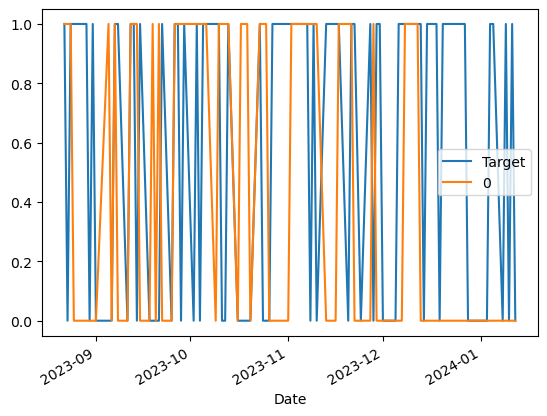

In [21]:
combined.plot()

** our prediction still so far 

## Building a backtesting system
key:
- Need to have certian amount of data to train  first model
- create prediction funtion
- create backtest funtion which is take
     - sp500 data, a machine learning model,prediction,start value and step value

In [22]:
#Create prediction funtion for backtesting.


def predict(train, test, predictors, model):#earier I only test data with the last 100
    model.fit(train[predictors], train["Target"])
    #generating predictions
    preds = model.predict(test[predictors])
    #combiled our model into a series as pd.Series
    preds = pd.Series(preds, index=test.index, name="Predictions")#giving series a name of prediction
    #combining everythings together
    combined = pd.concat([test["Target"], preds], axis=1)
    #return combined data frame with actual value and the prediction
    return combined
    

### This going to take 10 year of data and predict values for the 11th year than take the  first 11 of data predict value of the 12th year.......and so on

In [23]:
# #Backtest funtion .** when we backtest we needed a certain amount of data to train first model.
# ps. every trading year has about 250 days

def backtest(data, model, predictors, start=2500, step=250): #This take 10 years of data
    # 1 create a list call all prediction.a list where of data frame where dataframe is prediction for a single year
    all_predictions =[]
    #2 Create funtion to loop acroos our data year by year
        # and make presiction for all of the years except the first 10 and so
    for i in range(start, data.shape[0], step):
        # 3 split up our training and test data and use .copy to avoid the original copy warning
        train = data.iloc[0:i].copy() #training set is all of the year perio to the current year
        test = data.iloc[i:(i+step)].copy()#test set is current year
        # 4 Use predict funtion that we created to generate our predictions
        predictions = predict(train, test, predictors, model)
        # 5 Append all_prediction to our predictions for the given year
        all_predictions.append(predictions)
    #6.concatenate all prediction together by take a list of dataframe and combined em to sigle dataframe
    return pd.concat(all_predictions)
    

In [24]:
# back test by pass backtest(ticker,model,prediction)

predictions = backtest(sp500, model, predictors)#pass model that we created earlier and prediction
# back test by passing backtest(ticker, model, predictors)

## Valuating the  error of our predictions

In [25]:
# See how many days we predicted the market would go up or  versus down. 1 = market go up in a days , 0 = market go down in days


predictions["Predictions"].value_counts()

0    3502
1    2572
Name: Predictions, dtype: int64

In [26]:
# Look at the precision score error score by Takes the "Target" and "predictions"

precision_score(predictions["Target"],predictions["Predictions"])#precision error score

0.5217729393468118

In [27]:
# Look at the percentage of days where the market actually went up 
 #by use the target value count / the number of rows total
predictions["Target"].value_counts()/predictions.shape[0] 

1    0.534409
0    0.465591
Name: Target, dtype: float64

##  Adding additional perdictors to our model

In [33]:
# Create a variety of rolling average


# 1 calculate the mean close price in the last 2,5,60,250 days,
#  and than find the ratio in today closing price and the closing price in thoese period.


horizons = [2,5,60,250]#this is give algorirhm some more info that will help better prediction
# 2 create a list call new predictors which will hold some of new column that we are going tp create
new_predictors = []

#3 loop through this horizon that we spacifix
for horizon in horizons:
    # 4 calculate a rolling()  mean
    rolling_averages = sp500.rolling(horizon).mean()
    
    #5.create a couple of columns so one will be ratio column and close ratio horizon 
    ratio_column = f"Close_Ratio_{horizon}"
    #6. add closing price sp500 data = today close price / 2days ago close price and 5,60,250
    sp500[ratio_column] = sp500["Close"]/rolling_averages["Close"] # today close price / 2days ago close price, and so on from the 2,5
    
    trend_column = f"Trend_{horizon}"#The number of days in the pass x days that we spacifix on horizon that stock price went up
    #7. Find the rolling sme of target.*the some of number of days that stock price actually went up
    
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]#find sum of passed days in each list in horizon
    #8. Add new predictors 
    new_predictors += [ratio_column, trend_column]
    
    


**pandas cann't find enough days or enogh rows it will return NaN**

# Improving our Model

In [34]:
#Update model and change parameters
model = RandomForestClassifier(n_estimators=200,min_samples_split=50,random_state=42)

In [35]:
#Rewrite predict funtion that we created from the beginning but 
#we needed to define more on model.preict what is 1 or 0 so add .proba on prediction line



def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    #1.So adding preict.proba on so it will return probability that stock price will go down and up tomorow
    ## just get only a secound column which is proba the stock price go up
    preds = model.predict_proba(test[predictors])[:,1]
    #2.Set cutom threshold (it default = 0.5 mean >50 chane the price will go up)BUT we set 60% so model has to be more confident
    preds[preds >= .6] = 1 # this will reduce our total number of trading days = reduce number that predict the preic go up
    preds[preds <= .6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")#giving series a name of prediction
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined
    

In [36]:
# Run our backtest again

predictions = backtest(sp500, model, predictors)

In [37]:
# look at value count of predictions again(so now just 1056 days after asked model to be more confident)
predictions["Predictions"].value_counts()

0.0    5018
1.0    1056
Name: Predictions, dtype: int64

In [38]:
# see precision score on our "Target" and "Prediction"

precision_score(predictions["Target"], predictions["Predictions"])

0.5208333333333334

# Hyperameter Turning 